# Linear Regression 

## import library

In [1]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D

## load point data for training and testing

In [2]:
fname_data  = 'assignment_07_data.csv'

data        = np.genfromtxt(fname_data, delimiter=',')
num_data    = data.shape[0]

xx          = np.zeros(num_data)
yy          = np.zeros(num_data)
zz          = np.zeros(num_data)

for i in range(num_data):
    # data는 3개의 열(x,y,z)로 구성되어 있음

    xx[i] = data[i,0]
    yy[i] = data[i,1]
    zz[i] = data[i,2]

## plot the data in the three dimensional space

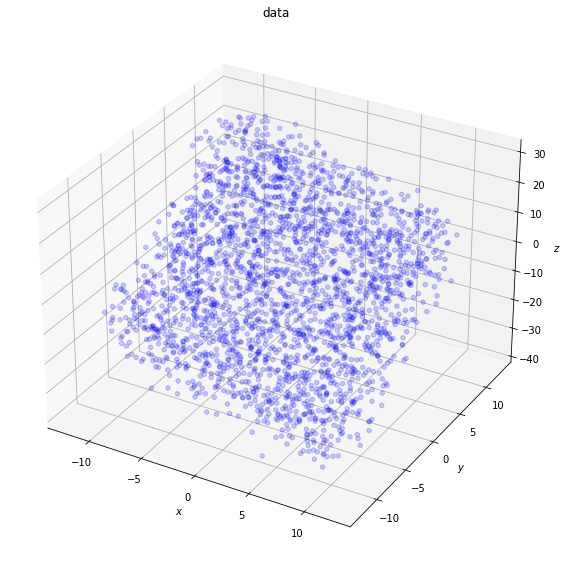

In [3]:
fig = plt.figure(figsize=(12, 8))

ax1 = plt.subplot(111, projection='3d')
plt.title('data')

ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_zlabel('$z$')

# scatter: 산점도, alpha: 투명도
ax1.scatter(xx, yy, zz, marker='o', color='blue', alpha=0.2)

# 명시한 여백에 관련된 서브플롯 파라미터를 조정
plt.tight_layout()
plt.show()

## compute the loss function

In [4]:
def compute_residual(theta, x, y, z):
    
    # theta는 벡터의 형태 [theta0, theta1, theta2]
    model = theta[0] + theta[1]*x + theta[2]*y
    residual = z - model
    num_data = residual.size
    
    return residual, num_data

In [5]:
def compute_loss(theta, x, y, z):
    
    residual, n = compute_residual(theta, x, y, z)
    summation = np.power(residual, 2)
    loss = summation.sum() / 2*n
    
    return loss

## compute the gradient for each model parameter (DO NOT COMPUTE THE GRADIENT FOR EACH MODEL PARAMETER, BUT DO COMPUTE THE GRADIENT OF THE MODEL PARAMTER VECTOR)

In [6]:
def compute_gradient(theta, x, y, z):
    # 한 번에 각각의 gradient를 구함
    # grad는 벡터, x=x_1, y=x_2
    
    n = x.size
    
    # x_i = ith training data, size(xi) = (d+1) x 1
    x_0 = np.ones((n,))
    
    # data matrix, size(X) = n x (d+1)
    # 벡터를 열벡터로 인식해서 행 방향으로 합쳐야함 : colume_stack
    X = np.column_stack((x_0, x, y))
    X_t = np.transpose(X)
    
    # theta0 + theta1 * x + theta2 * y, size = n*1
    Xtheta_sum = (theta*X).sum(axis=1)

    grad = 2 * (np.dot(X_t, (Xtheta_sum-z))) / n
    
    return grad

## gradient descent for each model parameter

In [25]:
num_iteration   = 1000
learning_rate   = 0.01

theta           = np.array((0, 0, 0))
theta_iteration = np.zeros((num_iteration, theta.size))
loss_iteration  = np.zeros(num_iteration)

for i in range(num_iteration):
    
    loss = compute_loss(theta_iteration[i-1], xx, yy, zz)
    gradient = compute_gradient(theta_iteration[i-1], xx, yy, zz)
    
    loss_iteration[i] = loss
    theta_iteration[i] = theta_iteration[i-1] - learning_rate*gradient
    
    print("iteration = %4d, loss = %5.5f" % (i, loss))
    
idx = np.argmin(loss_iteration)
theta = theta_iteration[idx]

iteration =    0, loss = 596048016.99059
iteration =    1, loss = 113980720.12246
iteration =    2, loss = 73996310.22798
iteration =    3, loss = 69816289.58618
iteration =    4, loss = 68570408.50656
iteration =    5, loss = 67597860.24634
iteration =    6, loss = 66681947.74510
iteration =    7, loss = 65803771.64540
iteration =    8, loss = 64960489.92586
iteration =    9, loss = 64150611.73085
iteration =   10, loss = 63372805.45947
iteration =   11, loss = 62625800.35086
iteration =   12, loss = 61908376.62232
iteration =   13, loss = 61219362.84762
iteration =   14, loss = 60557633.99325
iteration =   15, loss = 59922109.57733
iteration =   16, loss = 59311751.90505
iteration =   17, loss = 58725564.37428
iteration =   18, loss = 58162589.84831
iteration =   19, loss = 57621909.09298
iteration =   20, loss = 57102639.27580
iteration =   21, loss = 56603932.52441
iteration =   22, loss = 56124974.54213
iteration =   23, loss = 55664983.27845
iteration =   24, loss = 55223207.6520

In [26]:
f = theta[0] + theta[1] * xx + theta[2] * yy

## plot the results

In [34]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))
    plt.title('loss')
    
    plt.xlabel('iteration')
    XX = np.linspace(0, num_iteration, 1000)
    
    plt.plot(XX, loss_iteration, color='red')
    
    plt.tight_layout()
    plt.show()

In [35]:
def plot_data(xx, yy, zz):
    
    fig = plt.figure(figsize=(12, 8))
    ax  = plt.subplot(111, projection='3d')
    plt.title('data')
    
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')

    # scatter: 산점도, alpha: 투명도
    ax.scatter(xx, yy, zz, marker='o', color='blue', alpha=0.2)
    
    plt.tight_layout()
    plt.show()

In [36]:
def plot_model_parameter(theta_iteration):

    plt.figure(figsize=(8,6))
    plt.title('model parameter')
    
    plt.xlabel('iteration')
    
    XX = np.linspace(0, num_iteration, 1000)
    
    plt.plot(XX, theta_iteration[:,:1], color='red', label='theta0')
    plt.plot(XX, theta_iteration[:,1:2], color='green', label='theta1')
    plt.plot(XX, theta_iteration[:,2:], color='blue', label='theta2')
    
    plt.legend()
    
    plt.tight_layout()
    plt.show()

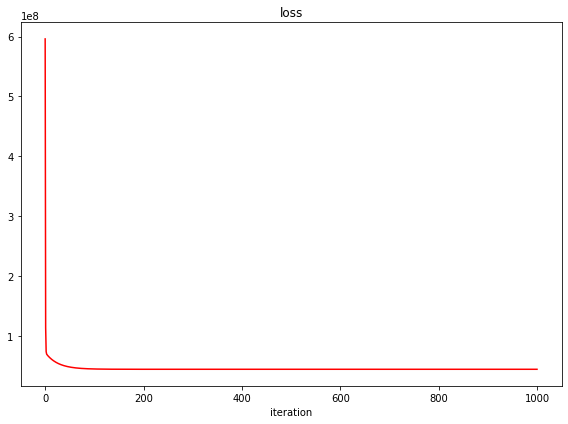

In [37]:
plot_loss_curve(loss_iteration)

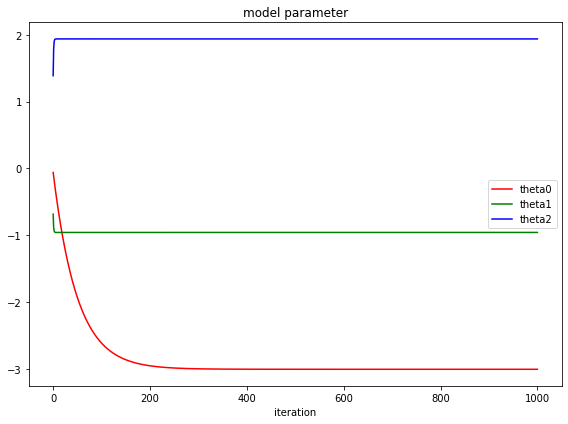

In [38]:
plot_model_parameter(theta_iteration)

In [69]:
Xdata = np.linspace(np.min(xx), np.max(xx), num_data)
Ydata = np.linspace(np.min(yy), np.max(yy), num_data)
XX, YY = np.meshgrid(Xdata, Ydata)
ZZ = theta[0] +theta[1]*XX + theta[2]*YY

def plot_surface(XX, YY, ZZ, xx, yy, zz):
    
    fig = plt.figure(figsize=(8,8))
    ax  = fig.add_subplot(111, projection='3d')
    plt.title('regression surface')

    ax  = plt.axes(projection='3d')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')

    ax.plot_surface(XX, YY, ZZ, color='red', alpha=0.2)
    ax.scatter(xx, yy, zz, marker='o', color='blue', alpha=0.2)
    
    
    
    plt.tight_layout()
    plt.show()

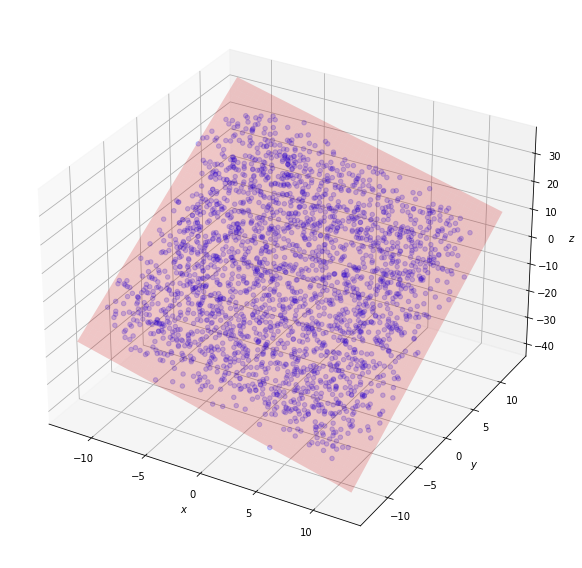

In [70]:
plot_surface(XX, YY, ZZ, xx, yy, zz)

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data in blue point in 3-dimensional space

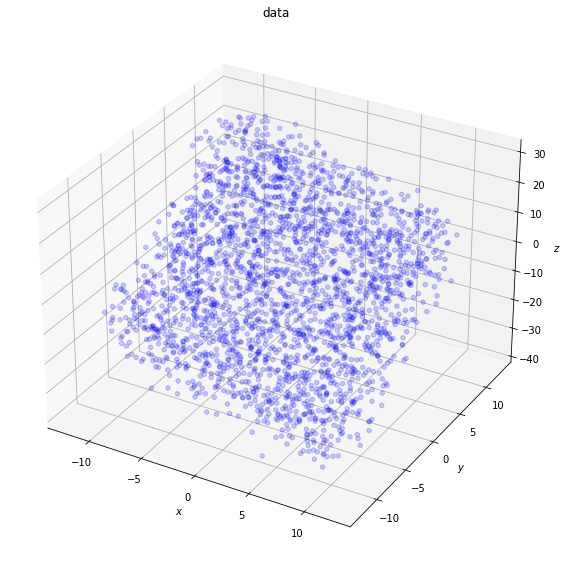

In [71]:
plot_data(xx, yy, zz)

### # 02. plot the values of the model parameters $\theta_0$ in red curve, $\theta_1$ in green curve, and $\theta_2$ in blue curve over the gradient descent iterations

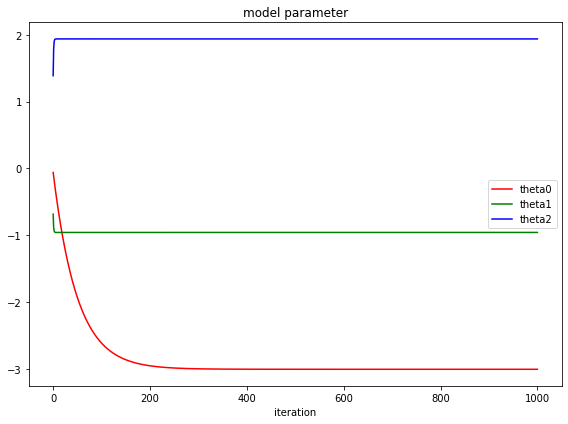

In [72]:
plot_model_parameter(theta_iteration)

### # 03. plot the loss values $\mathcal{L}(\theta)$ in red curve over the gradient descent iterations

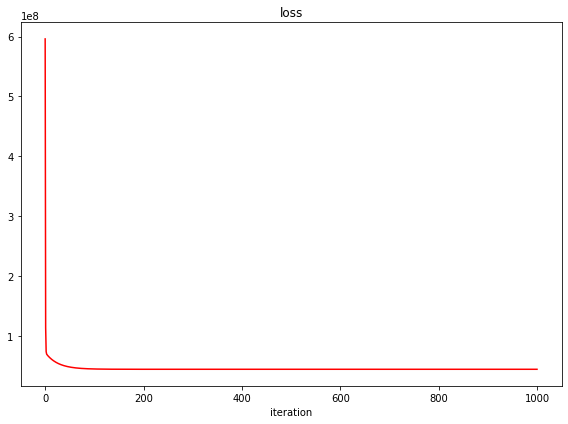

In [73]:
plot_loss_curve(loss_iteration)

### # 04. plot the optimal regression surface $\hat{f}(\theta^*)$ in 3-dimensional space with a given set of data points superimposed

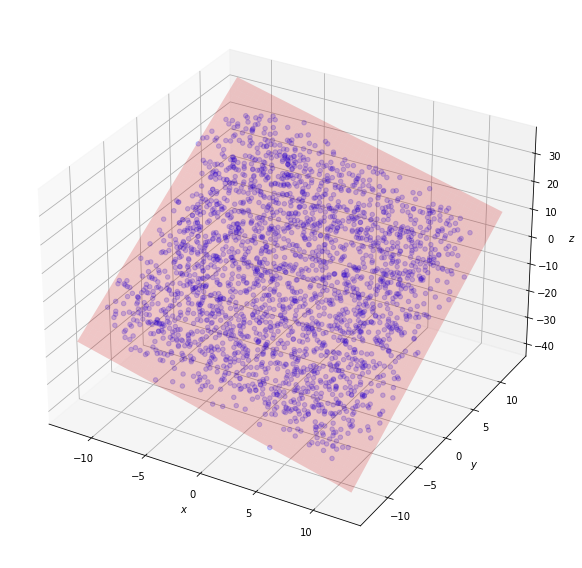

In [74]:
plot_surface(XX, YY, ZZ, xx, yy, zz)